In [ ]:
# Import required libraries
import pandas as pd

# Load the dataset
file_path = "/content/Big_Mart_Sales_Data.csv"
df = pd.read_csv(file_path)
#Print shape of the DataFrame
print("Shape of the train Dataset:")
print(df.shape)

Shape of the train Dataset:
(8523, 12)


In [ ]:
# Display schema (data types of each column)
print("Schema of the dataset:")
print(df.dtypes)

Schema of the dataset:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [ ]:
# Display first 5 rows of the dataset
print("Preview of the data:")
print(df.head())

Preview of the data:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medi

In [ ]:
#Display metadata summary
print("Metadata summary:")
summary = df.describe()
print(summary)

Metadata summary:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [ ]:
# imputing
# Standardize values in 'Item_Fat_Content'
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(
    {"low fat": "Low Fat", "Low Fat": "Low Fat", "LF": "Low Fat", "reg": "Regular", "Regular": "Regular"}
)

# Verify the cleaned column
print(df["Item_Fat_Content"].value_counts())

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


In [ ]:
# Identify categorical columns (dtype == object or categorical)
categorical_columns = df.select_dtypes(include=["object", "category"]).columns

# Count distinct values for each categorical column
for column in categorical_columns:
    print(f"Value counts for column: {column}")
    print(df[column].value_counts())
    print("-" * 50)


Value counts for column: Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64
--------------------------------------------------
Value counts for column: Item_Fat_Content
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
-

## Data Visualization

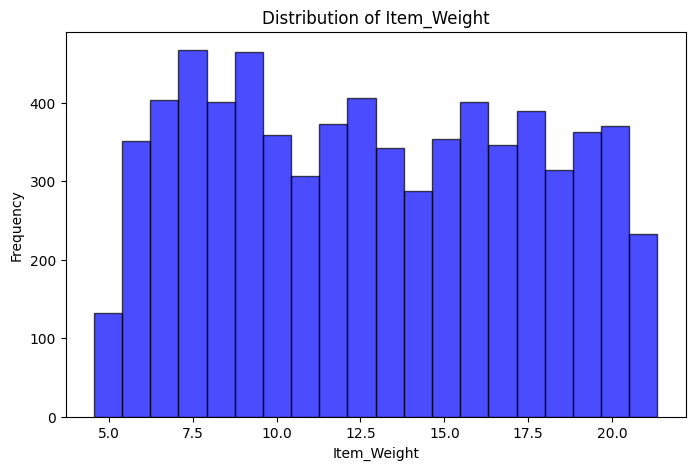

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot histogram for Item_Weight
plt.figure(figsize=(8, 5))
plt.hist(df["Item_Weight"].dropna(), bins=20, color="blue", edgecolor="black", alpha=0.7)
plt.title("Distribution of Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel("Frequency")
plt.show()

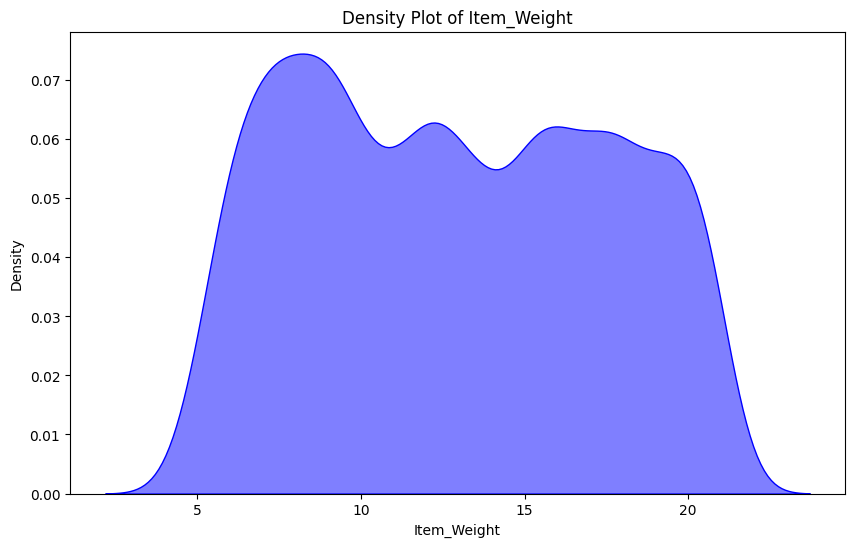

In [ ]:
# Import seaborn
import seaborn as sns

# Plot density plot for Item_Weight
plt.figure(figsize=(10, 6))
sns.kdeplot(df["Item_Weight"].dropna(), fill=True, color="blue", alpha=0.5)
plt.title("Density Plot of Item_Weight")
plt.xlabel("Item_Weight")
plt.ylabel("Density")
plt.show()

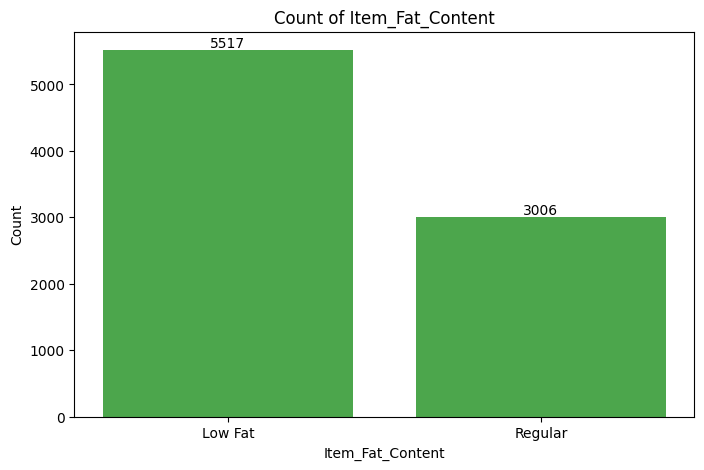

In [ ]:

# Count occurrences of each value in 'Item_Fat_Content'
item_fat_content_counts = df["Item_Fat_Content"].value_counts().reset_index()
item_fat_content_counts.columns = ["Item_Fat_Content", "count"]

# Plot the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(item_fat_content_counts["Item_Fat_Content"], item_fat_content_counts["count"], color="green", alpha=0.7)

# Add counts on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,  # X-coordinate for the text
             bar.get_height(),  # Y-coordinate for the text
             str(int(bar.get_height())),  # Text to display (the count)
             ha="center", va="bottom", fontsize=10)  # Text alignment

# Add titles and labels
plt.title("Count of Item_Fat_Content")
plt.xlabel("Item_Fat_Content")
plt.ylabel("Count")
plt.show()

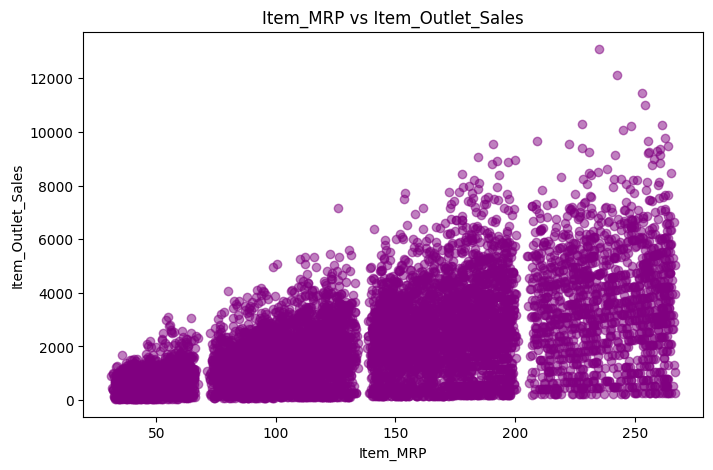

In [ ]:
# Prepare data for plotting
item_mrp_sales = df[["Item_MRP", "Item_Outlet_Sales"]]

# Plot scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(item_mrp_sales["Item_MRP"], item_mrp_sales["Item_Outlet_Sales"], alpha=0.5, c='purple')
plt.title("Item_MRP vs Item_Outlet_Sales")
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.show()

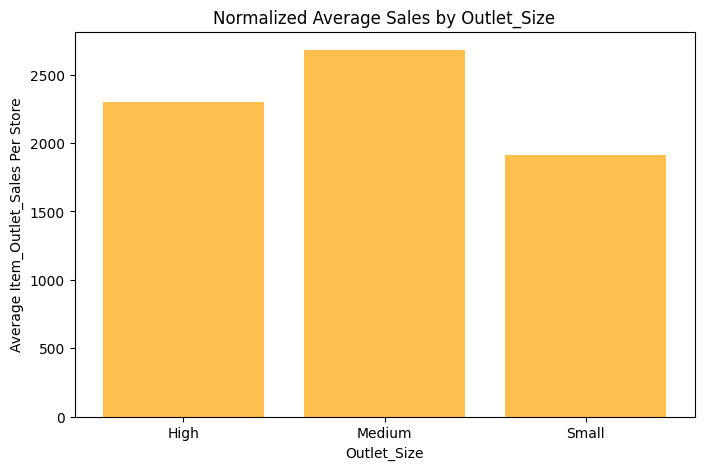

In [ ]:
# Aggregate data: Calculate total sales and store count for each Outlet_Size
outlet_size_sales = df.groupby("Outlet_Size").agg(
    total_sales=("Item_Outlet_Sales", "sum"),
    store_count=("Outlet_Identifier", "count")
).reset_index()

# Calculate normalized average sales per store
outlet_size_sales["avg_sales_per_store"] = outlet_size_sales["total_sales"] / outlet_size_sales["store_count"]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(outlet_size_sales["Outlet_Size"], outlet_size_sales["avg_sales_per_store"], color="orange", alpha=0.7)
plt.title("Normalized Average Sales by Outlet_Size")
plt.xlabel("Outlet_Size")
plt.ylabel("Average Item_Outlet_Sales Per Store")
plt.show()


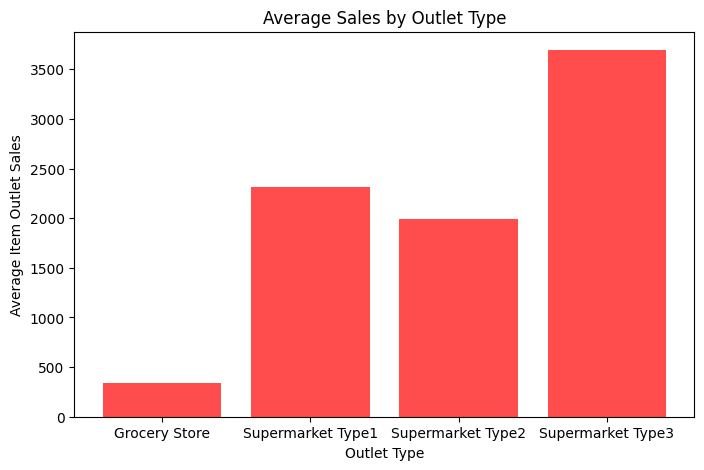

In [ ]:
# Aggregate data: Calculate average sales for each Outlet_Type
outlet_type_sales = df.groupby("Outlet_Type")["Item_Outlet_Sales"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(outlet_type_sales["Outlet_Type"], outlet_type_sales["Item_Outlet_Sales"], color="red", alpha=0.7)
plt.title("Average Sales by Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Average Item Outlet Sales")
plt.show()

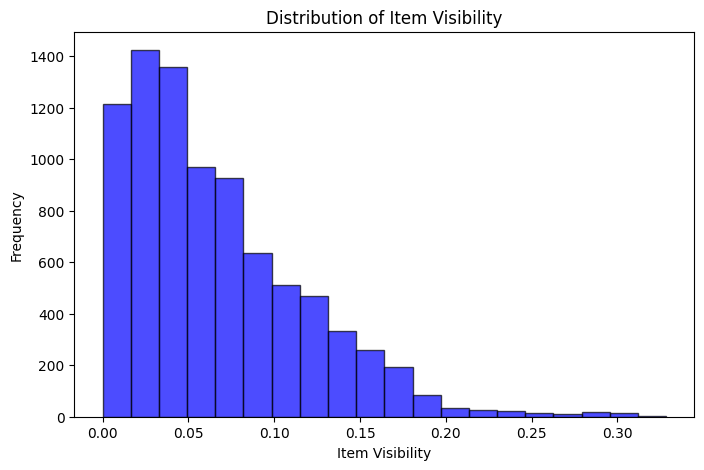

In [ ]:
# Prepare data for plotting
item_visibility_data = df["Item_Visibility"].dropna()

# Plot
plt.figure(figsize=(8, 5))
plt.hist(item_visibility_data, bins=20, color="blue", edgecolor="black", alpha=0.7)
plt.title("Distribution of Item Visibility")
plt.xlabel("Item Visibility")
plt.ylabel("Frequency")
plt.show()

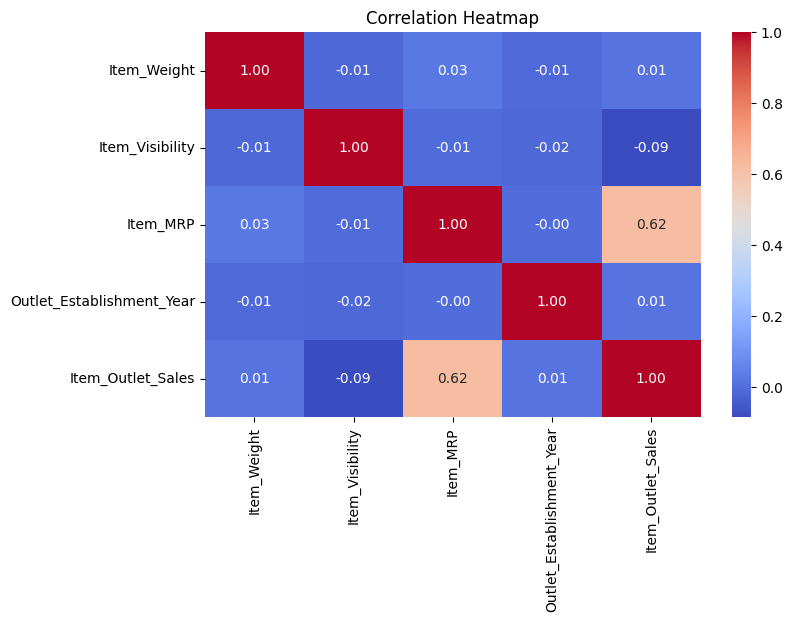

In [ ]:
# Select numerical columns
numerical_cols = ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]
numerical_data = df[numerical_cols].dropna()

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

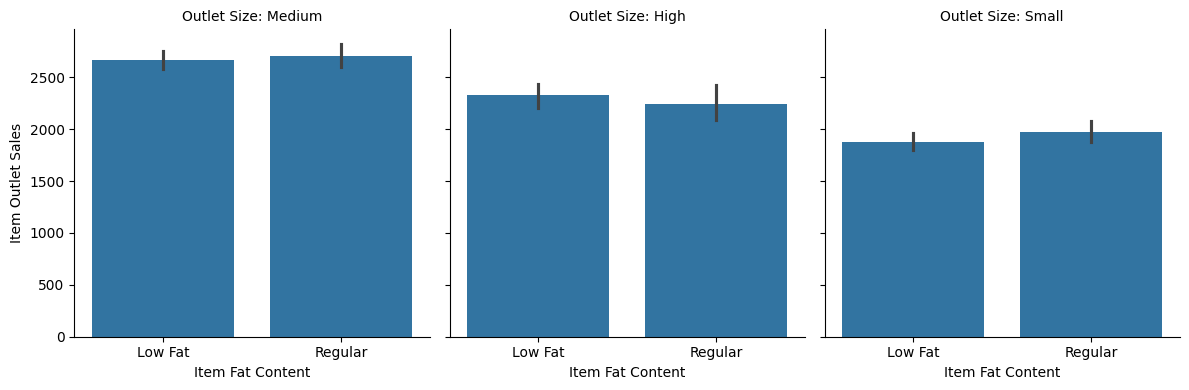

In [ ]:
# Prepare data
facet_data = df[["Item_Fat_Content", "Item_Outlet_Sales", "Outlet_Size"]].dropna()

# Plot
g = sns.FacetGrid(facet_data, col="Outlet_Size", height=4, aspect=1)
g.map(sns.barplot, "Item_Fat_Content", "Item_Outlet_Sales", order=["Low Fat", "Regular"])
g.set_titles("Outlet Size: {col_name}")
g.set_axis_labels("Item Fat Content", "Item Outlet Sales")
plt.show()

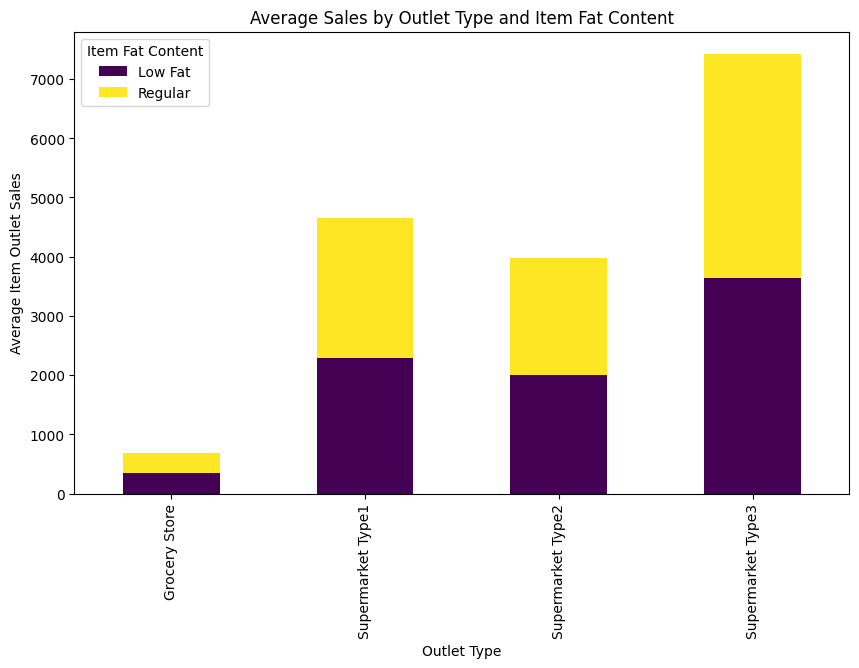

In [ ]:
# Aggregate data: Calculate average sales for Outlet_Type and Item_Fat_Content
stacked_data = df.groupby(["Outlet_Type", "Item_Fat_Content"])["Item_Outlet_Sales"].mean().reset_index()

# Pivot for stacked bar chart
stacked_pivot = stacked_data.pivot(index="Outlet_Type", columns="Item_Fat_Content", values="Item_Outlet_Sales")

# Plot
stacked_pivot.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Average Sales by Outlet Type and Item Fat Content")
plt.xlabel("Outlet Type")
plt.ylabel("Average Item Outlet Sales")
plt.legend(title="Item Fat Content")
plt.show()


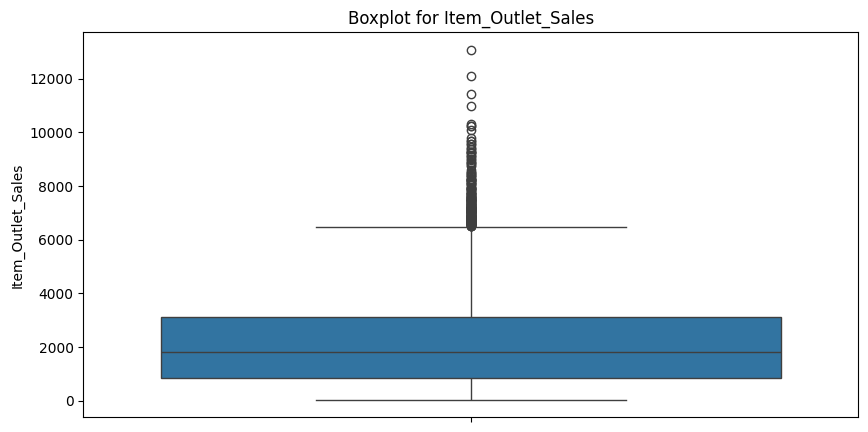

Total outliers detected: 186


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(df['Item_Outlet_Sales'])
plt.title('Boxplot for Item_Outlet_Sales')
plt.show()

# Identifying outliers using IQR method
Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Item_Outlet_Sales'] < Q1 - 1.5 * IQR) | (df['Item_Outlet_Sales'] > Q3 + 1.5 * IQR)]
print(f"Total outliers detected: {outliers.shape[0]}")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

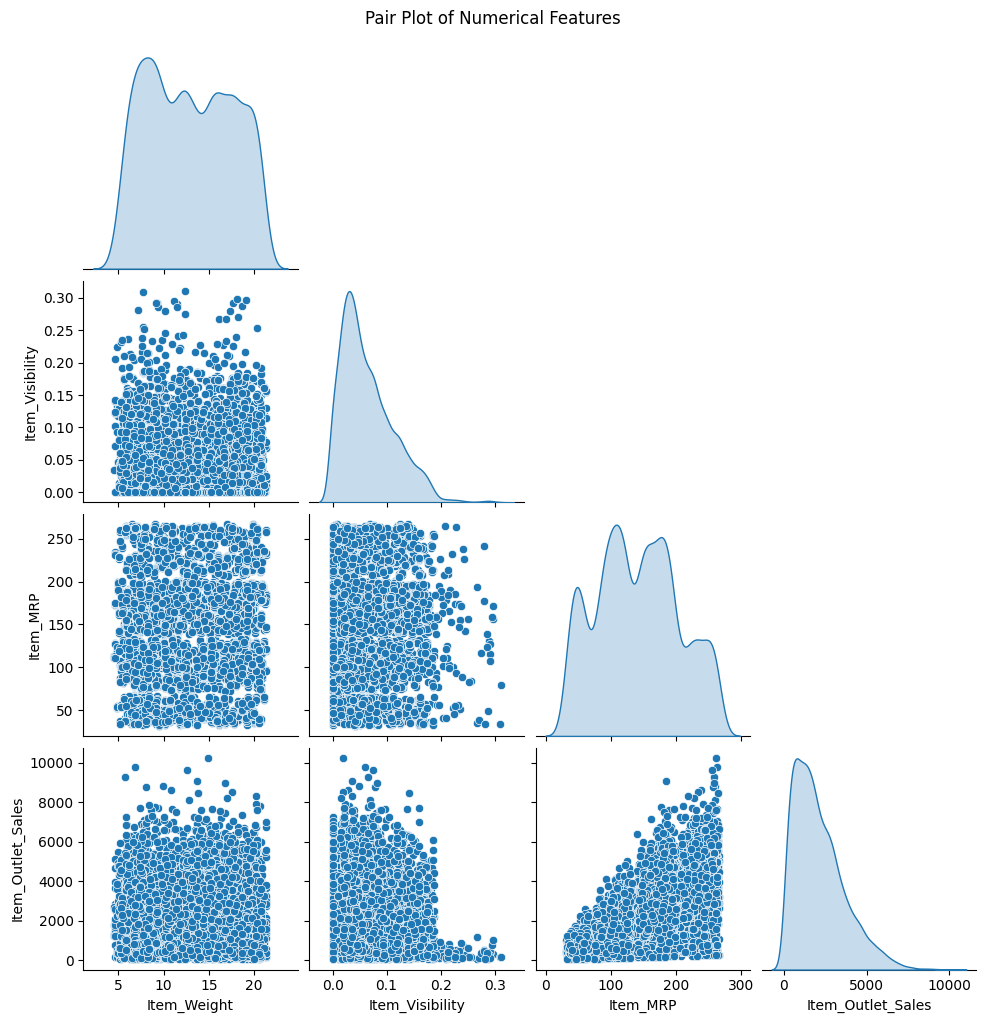

In [ ]:
# Select numerical columns
numerical_cols = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
pairplot_data = df[numerical_cols].dropna()

# Plot
sns.pairplot(pairplot_data, diag_kind="kde", corner=True, palette="husl")
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


## Training the model

In [ ]:
train_df = df.copy()

In [ ]:
#Define file paths
train_path = "/content/big mart train.csv"
test_path = "/content/big mart test.csv"

# Load train and test datasets using pandas
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Print schema (data types) of train and test datasets
print("Schema of train_df:")
print(train_df.dtypes)

print("\nSchema of test_df:")
print(test_df.dtypes)

Schema of train_df:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Schema of test_df:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Sample data for demonstration
data = {
    "Item_Weight": [9.3, 5.92, 17.5, 19.2, 8.7],
    "Item_Visibility": [0.016, 0.019, 0.016, 0.0, 0.0],
    "Item_MRP": [249.8, 48.2, 141.6, 182.1, 53.9],
    "Outlet_Establishment_Year": [1999, 2009, 1999, 1998, 1987],
    "Item_Fat_Content": ["Low Fat", "Regular", "Low Fat", "Regular", "Low Fat"],
    "Item_Type": ["Dairy", "Soft Drinks", "Meat", "Fruits and Vegetables", "Household"],
    "Outlet_Size": ["Medium", "Medium", "Medium", "Small", "High"],
    "Outlet_Location_Type": ["Tier 1", "Tier 3", "Tier 1", "Tier 3", "Tier 3"],
    "Outlet_Type": ["Supermarket Type1", "Supermarket Type2", "Supermarket Type1", "Grocery Store", "Supermarket Type1"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# One-Hot Encoding for Categorical Columns
categorical_columns = [
    "Item_Fat_Content",
    "Item_Type",
    "Outlet_Size",
    "Outlet_Location_Type",
    "Outlet_Type"
]

# Apply OneHotEncoder with corrected parameter
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_df = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame for encoded features
encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out(categorical_columns))

# Combine Numerical and Encoded Categorical Columns
numerical_columns = [
    "Item_Weight",
    "Item_Visibility",
    "Item_MRP",
    "Outlet_Establishment_Year"
]

# Concatenate numerical and encoded features
feature_columns = pd.concat([df[numerical_columns].reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Standardize Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_columns)

# Create final feature DataFrame
feature_df = pd.DataFrame(scaled_features, columns=feature_columns.columns)

# Split into Train and Test Datasets
train_df, test_df = train_test_split(feature_df, test_size=0.2, random_state=42)

# Display sample results
print("Train Data Sample:")
print(train_df.head())

print("\nTest Data Sample:")
print(test_df.head())


Train Data Sample:
   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
4    -0.653741        -1.214286 -1.056457                  -1.634587   
2     1.026435         0.690476  0.084288                   0.086031   
0    -0.539184         0.690476  1.491683                   0.086031   
3     1.351014        -1.214286  0.611085                  -0.057354   

   Item_Fat_Content_Regular  Item_Type_Fruits and Vegetables  \
4                 -0.816497                             -0.5   
2                 -0.816497                             -0.5   
0                 -0.816497                             -0.5   
3                  1.224745                              2.0   

   Item_Type_Household  Item_Type_Meat  Item_Type_Soft Drinks  \
4                  2.0            -0.5                   -0.5   
2                 -0.5             2.0                   -0.5   
0                 -0.5            -0.5                   -0.5   
3                 -0.5            -0.5 

In [ ]:
#Linear Regression
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer


# # # Load the train and test datasets
train_df = pd.read_csv("/content/big mart train.csv")
test_df = pd.read_csv("/content/big mart test.csv")

# Define the feature columns and target column
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
target_column = 'Item_Outlet_Sales'

# Split the data into features and target
X = train_df[categorical_columns + numerical_columns]
y = train_df[target_column]

# Handle missing values and preprocessing (impute and scale)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
            ('scaler', StandardScaler())  # Standardize numerical features
        ]), numerical_columns),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing categorical values with 'missing'
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_columns)
    ]
)

# Create the pipeline with the Linear Regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# 8. Evaluate the Model using Regression Metrics
# Train Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test Metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f'Train Mean Squared Error: {train_mse}')
print(f'Test Mean Squared Error: {test_mse}')
print(f'Train Root Mean Squared Error: {train_rmse}')
print(f'Test Root Mean Squared Error: {test_rmse}')
print(f'Train Mean Absolute Error: {train_mae}')
print(f'Test Mean Absolute Error: {test_mae}')
print(f'Train R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

Train Mean Squared Error: 994484.11080845
Test Mean Squared Error: 1622298.6967974626
Train Root Mean Squared Error: 997.2382417499091
Test Root Mean Squared Error: 1273.6948994156578
Train Mean Absolute Error: 743.1063299950292
Test Mean Absolute Error: 944.2090006554158
Train R-squared: 0.6638041846821143
Test R-squared: 0.4031212055190625


In [ ]:
# Poynomial Regression
from sklearn.preprocessing import PolynomialFeatures
# 1. Extract Features and Target
X_train = train_df.drop(columns=['Item_Outlet_Sales'])  # Dropping target column from features
y_train = train_df['Item_Outlet_Sales']  # Target column

# 2. Identify categorical columns (assuming columns with object dtype are categorical)
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(exclude=['object']).columns

# 3. Preprocessing Pipeline
# - Handle missing values for numerical columns with median imputation
# - Handle missing values for categorical columns with the most frequent value imputation
# - One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ])

# 4. Define Model Pipeline for Polynomial Regression
# - Add PolynomialFeatures step before LinearRegression to implement Polynomial Regression
polynomial_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Degree 2 Polynomial
    ('regressor', LinearRegression())
])

# 5. Split the data into training and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 6. Train Model
polynomial_model.fit(X_train_split, y_train_split)

# 7. Predict on Training and Test Data
y_train_pred = polynomial_model.predict(X_train_split)
y_test_pred = polynomial_model.predict(X_test_split)

# 8. Evaluate the Model using Regression Metrics
# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train_split, y_train_pred)
test_mse = mean_squared_error(y_test_split, y_test_pred)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train_split, y_train_pred)
test_mae = mean_absolute_error(y_test_split, y_test_pred)

# R-Squared (R2 Score)
train_r2 = r2_score(y_train_split, y_train_pred)
test_r2 = r2_score(y_test_split, y_test_pred)

# Print the evaluation metrics
print(f'Train Mean Squared Error: {train_mse}')
print(f'Test Mean Squared Error: {test_mse}')
print(f'Train Root Mean Squared Error: {train_rmse}')
print(f'Test Root Mean Squared Error: {test_rmse}')
print(f'Train Mean Absolute Error: {train_mae}')
print(f'Test Mean Absolute Error: {test_mae}')
print(f'Train R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')


Train Mean Squared Error: 879510.9255924373
Test Mean Squared Error: 1434610.1809937737
Train Root Mean Squared Error: 937.8224382005568
Test Root Mean Squared Error: 1197.7521367101683
Train Mean Absolute Error: 673.5252384537881
Test Mean Absolute Error: 857.0825920697407
Train R-squared: 0.7026720794260222
Test R-squared: 0.47217587176022535


In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

#  Preprocessing Pipeline
# - Handle missing values for numerical columns with median imputation
# - Handle missing values for categorical columns with the most frequent value imputation
# - One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  # Impute missing values for numerical columns
            ('scaler', StandardScaler())  # Standardize numerical features
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_cols)
    ])

# 4. Define Model Pipeline for Decision Tree Regression
decision_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))  # Using Decision Tree for regression
])

# 5. Split the data into training and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 6. Train Model
decision_tree_model.fit(X_train_split, y_train_split)

# 7. Predict on Training and Test Data
y_train_pred = decision_tree_model.predict(X_train_split)
y_test_pred = decision_tree_model.predict(X_test_split)

# 8. Evaluate the Model using Regression Metrics
# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train_split, y_train_pred)
test_mse = mean_squared_error(y_test_split, y_test_pred)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train_split, y_train_pred)
test_mae = mean_absolute_error(y_test_split, y_test_pred)

# R-Squared (R2 Score)
train_r2 = r2_score(y_train_split, y_train_pred)
test_r2 = r2_score(y_test_split, y_test_pred)

# Print the evaluation metrics
print(f'Train Mean Squared Error: {train_mse}')
print(f'Test Mean Squared Error: {test_mse}')
print(f'Train Root Mean Squared Error: {train_rmse}')
print(f'Test Root Mean Squared Error: {test_rmse}')
print(f'Train Mean Absolute Error: {train_mae}')
print(f'Test Mean Absolute Error: {test_mae}')
print(f'Train R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')


Train Mean Squared Error: 9.099229384200216e-29
Test Mean Squared Error: 1993998.4216524598
Train Root Mean Squared Error: 9.538988093189034e-15
Test Root Mean Squared Error: 1412.09008977914
Train Mean Absolute Error: 2.000941702345838e-16
Test Mean Absolute Error: 967.4648032844575
Train R-squared: 1.0
Test R-squared: 0.2663648337619291


In [ ]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
# 3. Preprocessing Pipeline
# - Handle missing values for numerical columns with median imputation
# - Handle missing values for categorical columns with the most frequent value imputation
# - One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  # Impute missing values for numerical columns
            ('scaler', StandardScaler())  # Standardize numerical features
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_cols)
    ])

# 4. Define Model Pipeline for Random Forest Regression
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))  # Using Random Forest for regression
])

# 5. Split the data into training and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 6. Train Model
random_forest_model.fit(X_train_split, y_train_split)

# 7. Predict on Training and Test Data
y_train_pred = random_forest_model.predict(X_train_split)
y_test_pred = random_forest_model.predict(X_test_split)

# 8. Evaluate the Model using Regression Metrics
# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train_split, y_train_pred)
test_mse = mean_squared_error(y_test_split, y_test_pred)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train_split, y_train_pred)
test_mae = mean_absolute_error(y_test_split, y_test_pred)

# R-Squared (R2 Score)
train_r2 = r2_score(y_train_split, y_train_pred)
test_r2 = r2_score(y_test_split, y_test_pred)

# Print the evaluation metrics
print(f'Train Mean Squared Error: {train_mse}')
print(f'Test Mean Squared Error: {test_mse}')
print(f'Train Root Mean Squared Error: {train_rmse}')
print(f'Test Root Mean Squared Error: {test_rmse}')
print(f'Train Mean Absolute Error: {train_mae}')
print(f'Test Mean Absolute Error: {test_mae}')
print(f'Train R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')


Train Mean Squared Error: 185436.51652819497
Test Mean Squared Error: 1187170.194071116
Train Root Mean Squared Error: 430.62340452905596
Test Root Mean Squared Error: 1089.5734000383434
Train Mean Absolute Error: 298.70533131094163
Test Mean Absolute Error: 757.1078315249267
Train R-squared: 0.9373112348539945
Test R-squared: 0.5632143971515908


In [ ]:
# XG Boost Regression
!pip install xgboost
import xgboost as xgb

# 3. Preprocessing Pipeline
# - Handle missing values for numerical columns with median imputation
# - Handle missing values for categorical columns with the most frequent value imputation
# - One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  # Impute missing values for numerical columns
            ('scaler', StandardScaler())  # Standardize numerical features
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_cols)
    ])

# 4. Define Model Pipeline for XGBoost Regression
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))  # Using XGBoost for regression
])

# 5. Split the data into training and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 6. Train Model
xgb_model.fit(X_train_split, y_train_split)

# 7. Predict on Training and Test Data
y_train_pred = xgb_model.predict(X_train_split)
y_test_pred = xgb_model.predict(X_test_split)

# 8. Evaluate the Model using Regression Metrics
# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train_split, y_train_pred)
test_mse = mean_squared_error(y_test_split, y_test_pred)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train_split, y_train_pred)
test_mae = mean_absolute_error(y_test_split, y_test_pred)

# R-Squared (R2 Score)
train_r2 = r2_score(y_train_split, y_train_pred)
test_r2 = r2_score(y_test_split, y_test_pred)

# Print the evaluation metrics
print(f'Train Mean Squared Error: {train_mse}')
print(f'Test Mean Squared Error: {test_mse}')
print(f'Train Root Mean Squared Error: {train_rmse}')
print(f'Test Root Mean Squared Error: {test_rmse}')
print(f'Train Mean Absolute Error: {train_mae}')
print(f'Test Mean Absolute Error: {test_mae}')
print(f'Train R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')



Train Mean Squared Error: 829064.1640186582
Test Mean Squared Error: 1166041.3064016893
Train Root Mean Squared Error: 910.5296063383432
Test Root Mean Squared Error: 1079.833925380051
Train Mean Absolute Error: 655.743394931003
Test Mean Absolute Error: 748.4885113395636
Train R-squared: 0.7197261378600541
Test R-squared: 0.5709881721202488
